In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Oral Cancer Prediction Dataset/oral_cancer_prediction_dataset.csv')
data

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,84918,USA,46,Male,Yes,No,No,No,No,Yes,...,No,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84918,84919,USA,41,Male,Yes,Yes,No,No,No,No,...,Yes,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84919,84920,Taiwan,72,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,4.777394,1,Surgery,85.633426,81352.50,90,No,Yes
84920,84921,Japan,67,Male,Yes,No,No,No,No,No,...,Yes,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No


Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

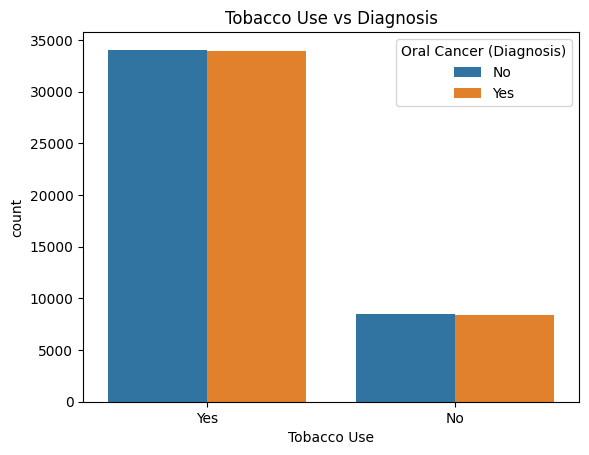

In [ ]:
plt.figure()
sns.countplot(x="Tobacco Use", hue="Oral Cancer (Diagnosis)", data=data)
plt.title("Tobacco Use vs Diagnosis")
plt.show()

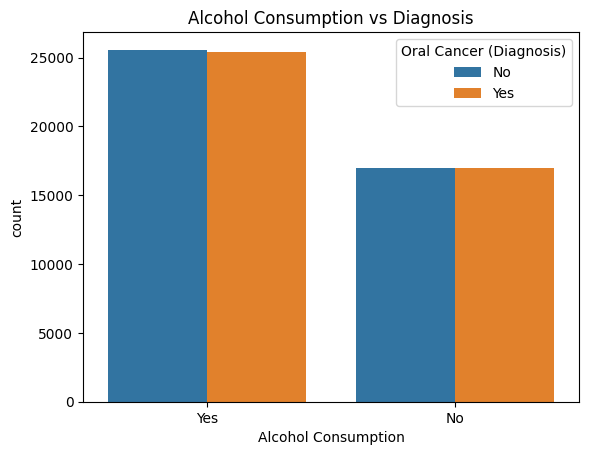

In [ ]:
plt.figure()
sns.countplot(x="Alcohol Consumption", hue="Oral Cancer (Diagnosis)", data=data)
plt.title("Alcohol Consumption vs Diagnosis")
plt.show()

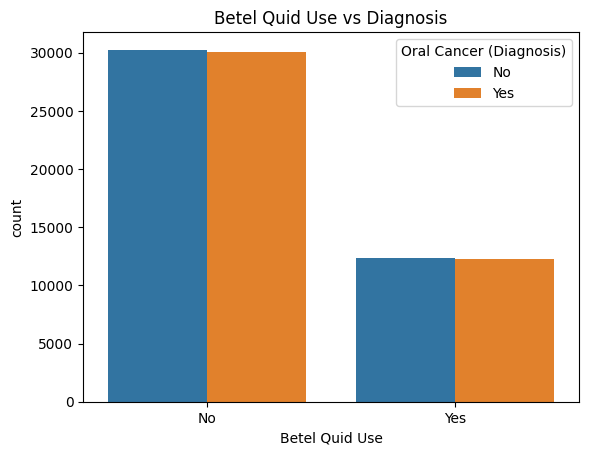

In [ ]:
plt.figure()
sns.countplot(x="Betel Quid Use", hue="Oral Cancer (Diagnosis)", data=data)
plt.title("Betel Quid Use vs Diagnosis")
plt.show()

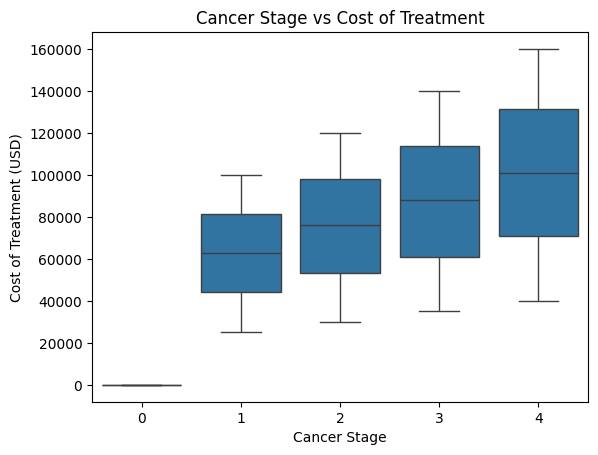

In [ ]:
plt.figure()
sns.boxplot(x="Cancer Stage", y="Cost of Treatment (USD)", data=data)
plt.title("Cancer Stage vs Cost of Treatment")
plt.show()

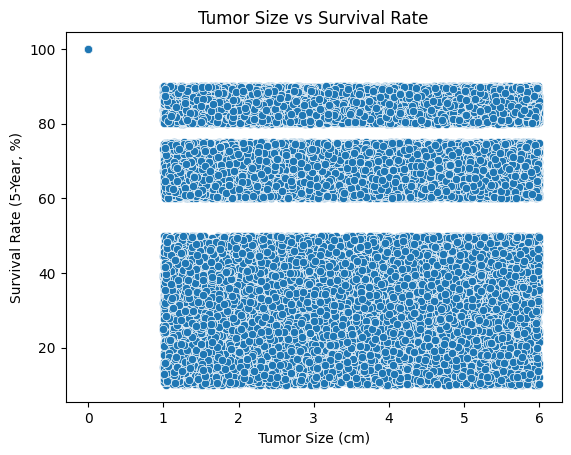

In [ ]:
plt.figure()
sns.scatterplot(x="Tumor Size (cm)",y="Survival Rate (5-Year, %)",data=data)
plt.title("Tumor Size vs Survival Rate")
plt.show()

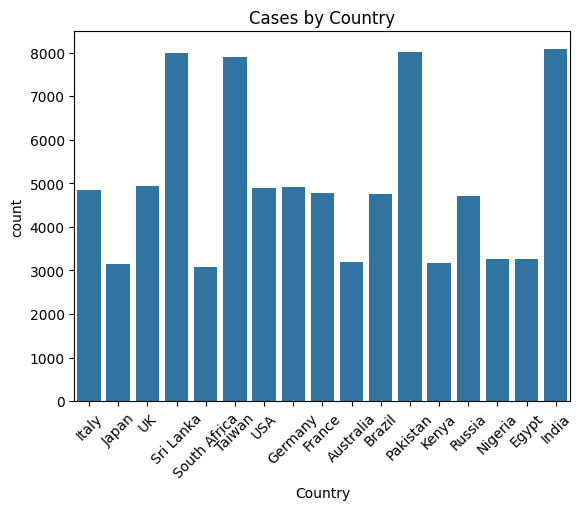

In [ ]:
plt.figure()
sns.countplot(x="Country", data=data)
plt.title("Cases by Country")
plt.xticks(rotation=45)
plt.show()

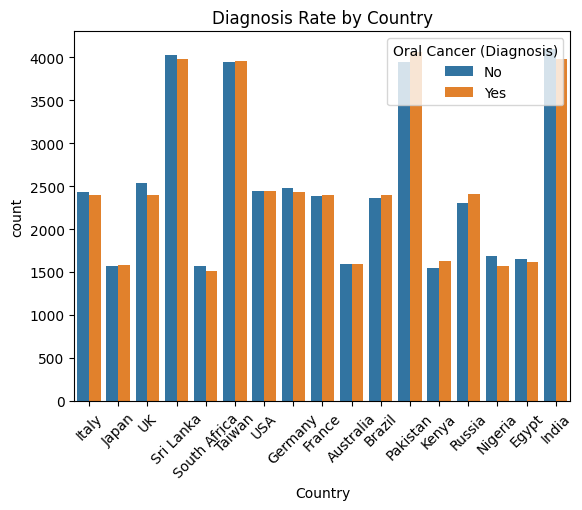

In [ ]:
plt.figure()
sns.countplot(x="Country", hue="Oral Cancer (Diagnosis)", data=data)
plt.title("Diagnosis Rate by Country")
plt.xticks(rotation=45)
plt.show()

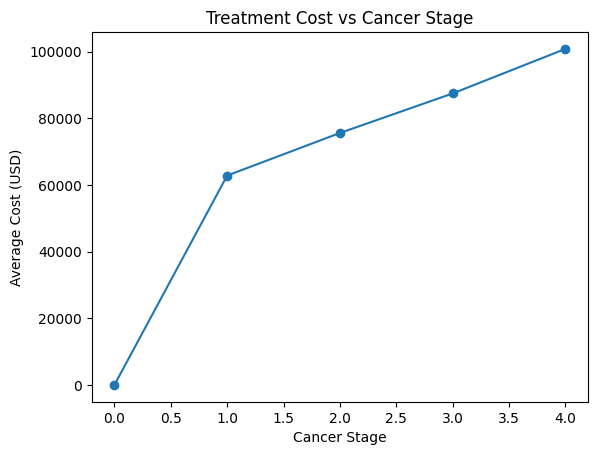

In [ ]:
avg_cost = data.groupby("Cancer Stage")["Cost of Treatment (USD)"].mean()
plt.plot(avg_cost, marker='o')
plt.title("Treatment Cost vs Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Average Cost (USD)")
plt.show()

Preprocessing steps

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [ ]:
data.select_dtypes(include='O').columns

Index(['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis',
       'Oral Cancer (Diagnosis)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns=['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis',
       'Oral Cancer (Diagnosis)']


encoders=[LabelEncoder() for i in object_columns]

for i,col in enumerate(object_columns):
  data[col]=encoders[i].fit_transform(data[col])
  print(list(enumerate(encoders[i].classes_)))

[(0, 'Australia'), (1, 'Brazil'), (2, 'Egypt'), (3, 'France'), (4, 'Germany'), (5, 'India'), (6, 'Italy'), (7, 'Japan'), (8, 'Kenya'), (9, 'Nigeria'), (10, 'Pakistan'), (11, 'Russia'), (12, 'South Africa'), (13, 'Sri Lanka'), (14, 'Taiwan'), (15, 'UK'), (16, 'USA')]
[(0, 'Female'), (1, 'Male')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'High'), (1, 'Low'), (2, 'Moderate')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]
[(0, 'Chemotherapy'), (1, 'No Treatment'), (2, 'Radiation'), (3, 'Surgery'), (4, 'Targeted Therapy')]
[(0, 'No'), (1, 'Yes')]
[(0, 'No'), (1, 'Yes')]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  int64  
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  int64  
 4   Tobacco Use                               84922 non-null  int64  
 5   Alcohol Consumption                       84922 non-null  int64  
 6   HPV Infection                             84922 non-null  int64  
 7   Betel Quid Use                            84922 non-null  int64  
 8   Chronic Sun Exposure                      84922 non-null  int64  
 9   Poor Oral Hygiene                         84922 non-null  int64  
 10  Diet (Fruits & Vegetables Intake) 

In [ ]:
X=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [ ]:
y.value_counts()

,count
Oral Cancer (Diagnosis),
0,42573
1,42349


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_x=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.3,random_state=1)

In [ ]:
# Algorithms : XGBoost , Random Forest , Decision Tree , LightGBM

Model Creation

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

XGBoost Algorithm

In [ ]:
modelxgb=XGBClassifier()
modelxgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
predxgb=modelxgb.predict(x_test)
print(accuracy_score(y_test,predxgb)*100)
print(classification_report(y_test,predxgb))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12771
           1       1.00      1.00      1.00     12706

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477



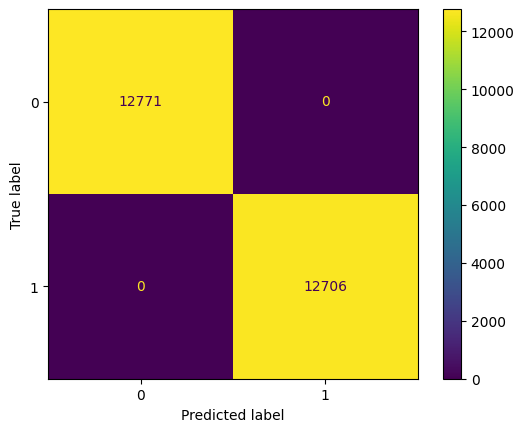

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,predxgb))

Random Forest Algorthm

In [ ]:
modelrf=RandomForestClassifier(random_state=1)
modelrf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
predrf=modelrf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(classification_report(y_test,predrf))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12771
           1       1.00      1.00      1.00     12706

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477



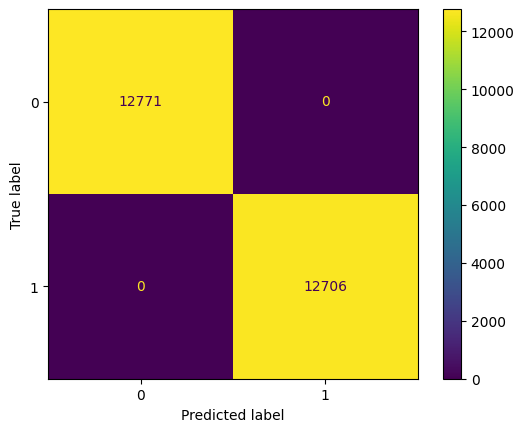

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,predrf))

Decision Tree algorthm

In [ ]:
modeldt=DecisionTreeClassifier(random_state=1)
modeldt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
preddt=modeldt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12771
           1       1.00      1.00      1.00     12706

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477



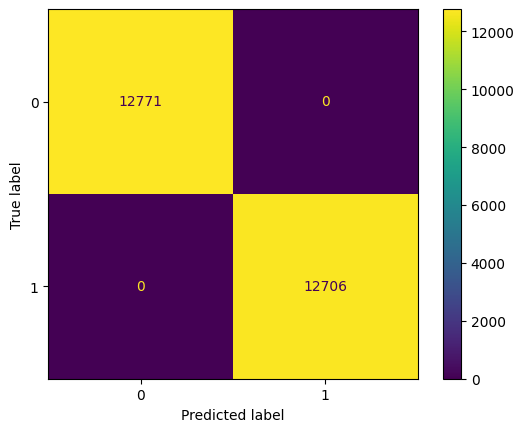

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,preddt))

LightGBM Algorithm

In [ ]:
modelgbm=LGBMClassifier()
modelgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 29643, number of negative: 29802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 59445, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498663 -> initscore=-0.005349
[LightGBM] [Info] Start training from score -0.005349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier()

In [ ]:
x_test=pd.DataFrame(x_test, columns=X.columns)

In [ ]:
predgbm=modelgbm.predict(x_test)
print(accuracy_score(y_test,predgbm)*100)
print(classification_report(y_test,predgbm))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12771
           1       1.00      1.00      1.00     12706

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477



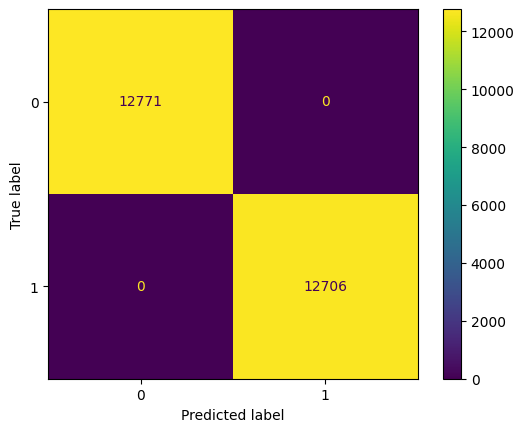

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,predgbm))